In [1]:
import numpy as np 
from library.pdf_estimators import * 
from library.information_continuos import *
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from library.plot import plot_settings, plot_kernels


df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


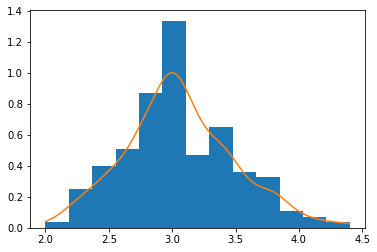

In [2]:
x, pdf = kde(df.sepal_width, gaussian)

plt.hist(df.sepal_width, bins='auto', density=True)
plt.plot(x, pdf)

In [3]:
from scipy.stats import norm

xReal = np.linspace(-5, 5, 10000)
dxReal = xReal[1] - xReal[0]
pdfReal = norm.pdf(xReal)

n_generated = 10000  # samples number to generate
E_pdf = []
kernels = ['gaussian', 'tophat', 'epanechnikov', 
           'exponential', 'linear', 'cosine']

In [8]:
n_samples = [np.power(10, i) for i in range(1, 6)]
results = np.zeros((len(n_samples), len(kernels)))
for i, kernel in enumerate(kernels):
    E_pdf = []
    for j, n in enumerate(n_samples):
        samples = np.random.normal(size=n)
        x, pdfEstimated = kde_sklearn(samples, kernel)

        E_pdf.append(diff_E(pdfEstimated, x))

    print(f'fatto kernel {kernel}')
    results[:, i] = E_pdf

fatto kernel gaussian
fatto kernel tophat
fatto kernel epanechnikov
fatto kernel exponential
fatto kernel linear
fatto kernel cosine


In [9]:
df = pd.DataFrame({'N generated': n_samples})

df[kernels] = results
df = df.set_index('N generated')
df

,gaussian,tophat,epanechnikov,exponential,linear,cosine
N generated,,,,,,
10,0.865109,0.967539,1.151826,0.687093,1.041904,1.067426
100,1.284626,1.383930,1.343623,1.381508,1.354098,1.240247
1000,1.401582,1.413949,1.420527,1.469224,1.354272,1.408086
10000,1.439076,1.412664,1.413848,1.450433,1.428668,1.431679
100000,1.421113,1.419977,1.416065,1.423133,1.419899,1.421399


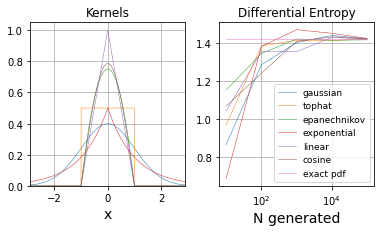

In [12]:
plot_settings()
fig, axs = plt.subplots(1, 2)
plot_kernels(axs[0])

df.plot(logx=True, ax=axs[1], lw=0.5)
axs[1].plot(n_samples, [diff_E(pdfReal, xReal)]* len(n_samples), label='exact pdf', lw=0.5)
axs[1].legend()
axs[1].grid()
axs[1].set_title('Differential Entropy')
axs[0].set_xlabel('x')
fig.tight_layout()
#plt.savefig('./Images/Kernels_diffential', dpi=600)

In [7]:
diff_E(pdfReal, xReal)

1.4189302661262027